In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('Sale Order History 09-09-2020.xlsx')

In [3]:
df.head()

,Name,Sale Org,plant,Territory,indent_no,So_No,SO_DATE,Sale Order Qty,Sale Order Amount,BILL_DATE,BILL_NO,Bill_Qty,Bill_Amt,Delivery_no,Status,Approval_date,Sale Order Pending Qty,Sale Order Pending Amount,Sale Order Cancel Qty,Sale Order Cancel Amount
0,Garg Medical Agency,1100,1001,Punjab,IND2021000003,3000002307,2020-07-01,NaN,NaN,2020-07-13,1.001102e+09,538,28158.0,8.000005e+09,PARTIAL SO CANCELLED,2020-07-09,NaN,NaN,NaN,NaN
1,Garg Medical Agency,1100,1001,Punjab,IND2021000003,3000002307,2020-07-01,1317.0,210906.0,2020-07-11,1.001102e+09,755,172572.0,8.000005e+09,PARTIAL SO CANCELLED,2020-07-09,NaN,NaN,24.0,10176.0
2,Partap Surgical,1100,1001,Punjab,IND2021000002,3000002308,2020-07-01,NaN,NaN,2020-07-11,1.001102e+09,106,17368.0,8.000005e+09,PARTIAL SO CANCELLED,2020-07-01,NaN,NaN,NaN,NaN
3,Partap Surgical,1100,1001,Punjab,IND2021000002,3000002308,2020-07-01,269.0,48091.0,2020-07-04,1.001102e+09,106,24708.0,8.000004e+09,PARTIAL SO CANCELLED,2020-07-01,NaN,NaN,57.0,6015.0
4,R.K. Medical Hall,1100,1001,Punjab,IND2021000005,3000002309,2020-07-01,201.0,47100.0,2020-07-09,1.001102e+09,201,47100.0,8.000005e+09,INVOICED,2020-07-07,0.0,0.0,NaN,NaN


In [4]:
sales = df[['SO_DATE','Sale Order Amount']]

In [5]:
sales['Sale Order Amount'].fillna(method='bfill',inplace=True)

F:\Anaconda\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [6]:
sales.columns = ['Month','Sales']

In [7]:
sales.set_index('Month',inplace=True)

In [8]:
sales_mean = sales.resample('D').sum()

In [9]:
sales_mean.tail()

,Sales
Month,
2020-09-05,5168518.95
2020-09-06,0.00
2020-09-07,5547648.00
2020-09-08,7358353.00
2020-09-09,225903.00


In [10]:
sales_mean.dropna(inplace=True)

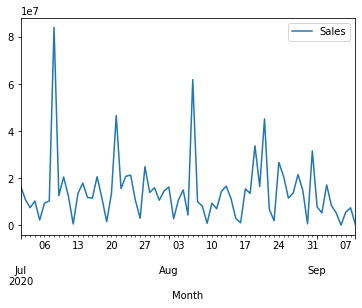

In [11]:
sales_mean.plot()

In [12]:
sales_mean.dropna(inplace=True)

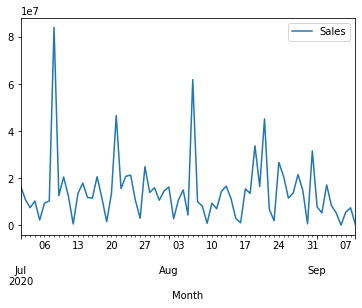

In [13]:
sales_mean.plot()

In [14]:
sales_mean.head()

,Sales
Month,
2020-07-01,16758936.76
2020-07-02,10894558.00
2020-07-03,7415369.00
2020-07-04,10220437.00
2020-07-05,2157109.00


In [15]:
from statsmodels.graphics.tsaplots import plot_acf

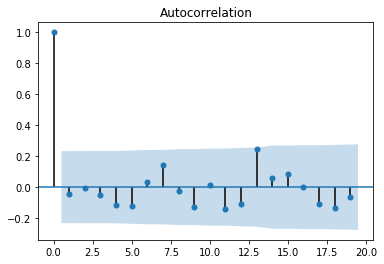

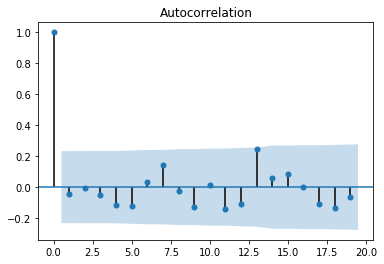

In [16]:
plot_acf(sales_mean['Sales'])

In [17]:
sales_diff = sales_mean.diff(periods=1)

In [18]:
sales_diff = sales_diff[1:]

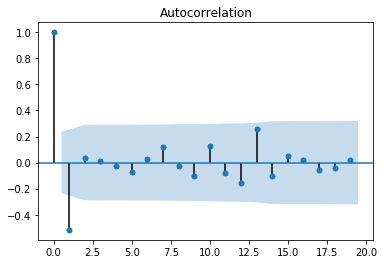

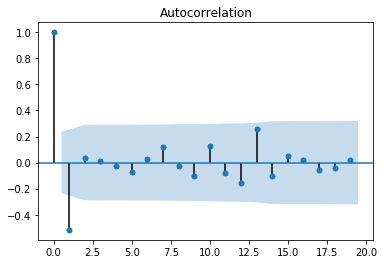

In [19]:
plot_acf(sales_diff)

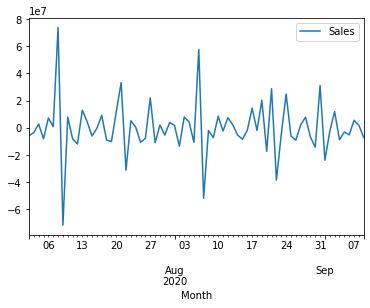

In [20]:
sales_diff.plot()

In [21]:
X = sales_mean.values

In [22]:
X.shape

(71, 1)

In [23]:
train = X[:55]
test = X[55:]

In [24]:
train.size

55

In [25]:
test.size

16

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
model_arima = ARIMA(train,order=(5,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

1955.1250315286534


F:\Anaconda\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [28]:
predictions = model_arima_fit.forecast(steps=15)[0]

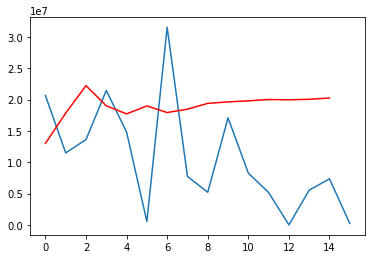

In [29]:
plt.plot(test)
plt.plot(predictions,'r')

In [30]:
import itertools
p=d=q=range(0,5)
pdq=itertools.product(p,d,q)

In [46]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=(param))
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 1975.026390816736
(0, 0, 1) 1976.7532423197106
(0, 0, 2) 1978.5412497367815
(0, 0, 3) 1977.9494262999788
(0, 0, 4) 1977.0070329635514
(0, 1, 0) 1980.891038127532
(0, 1, 1) 1948.2624546900001
(0, 1, 2) 1950.221058821492
(0, 1, 3) 1952.2170751209073
(0, 1, 4) 1953.5886535511027
(0, 2, 0) 2003.4681325606898
(0, 2, 1) 1956.0477990683798
(0, 2, 2) 1939.9777237683782
(0, 2, 3) 1939.1572199029267
(0, 2, 4) 1939.012031331955
(1, 0, 0) 1976.7720378246468
(1, 0, 1) 1973.605001152494
(1, 0, 2) 1975.4745813551199
(1, 0, 3) 1976.83843586958
(1, 0, 4) 1978.227552057493
(1, 1, 0) 1966.2593473360316
(1, 1, 1) 1950.6139315129753
(1, 1, 3) 1954.4900281111754
(1, 2, 0) 1971.658879653944
(2, 0, 0) 1978.732490352076
(2, 0, 1) 1975.4397420221314
(2, 0, 2) 1976.711753894783
(2, 0, 3) 1978.65973253772
(2, 0, 4) 1980.0350647676871
(2, 1, 0) 1964.032625697801
(2, 1, 1) 1952.2131916183275
(2, 2, 0) 1959.3676227936837
(2, 2, 1) 1945.7370361694443
(2, 2, 2) 1938.6724228276776
(2, 2, 4) 1943.7583455628746

In [31]:
import statsmodels.api as sm

In [32]:
model = sm.tsa.statespace.SARIMAX(sales_mean['Sales'],order=(9,1,1),seasonal_order=(9,1,1,12))
result = model.fit()

F:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
F:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


In [33]:
sales_mean['forecast'] = result.predict(start=55,end=70,dynamic=True)

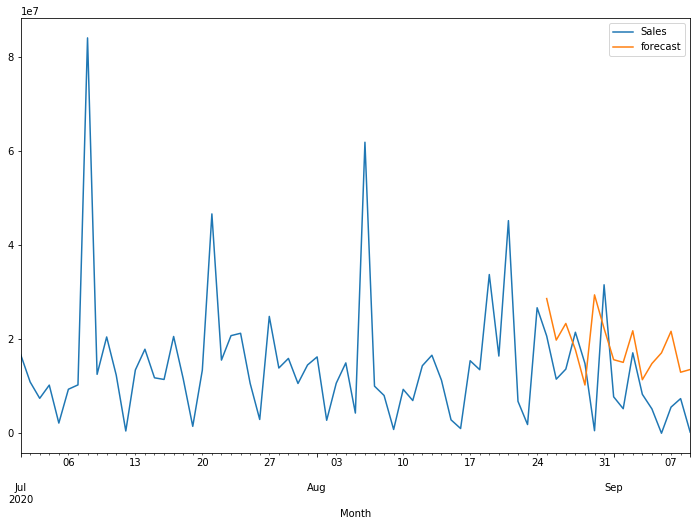

In [34]:
sales_mean[['Sales','forecast']].plot(figsize=(12,8))

In [35]:
sales_mean['forecast'].tail()

Month
2020-09-05    1.480202e+07
2020-09-06    1.707066e+07
2020-09-07    2.165634e+07
2020-09-08    1.296008e+07
2020-09-09    1.353708e+07
Freq: D, Name: forecast, dtype: float64

In [36]:
from pandas.tseries.offsets import DateOffset

In [37]:
future_dates = [sales_mean.index[-1] + DateOffset(days=x) for x in range(0,60)]

In [38]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=sales_mean.columns)

In [39]:
future_df = pd.concat([sales_mean,future_dates_df])

In [40]:
future_df['forecast'] = result.predict(start=69,end=130,dynamic=True)

In [41]:
a = result.predict(start=67,end=130,dynamic=True)

In [42]:
a.shape

(64,)

In [43]:
future_df['forecast'].shape

(130,)

In [44]:
future_df['forecast'][66:] = a

In [45]:
a.size

64

In [46]:
a

2020-09-06    5.925396e+06
2020-09-07    1.670262e+07
2020-09-08    8.916497e+06
2020-09-09    3.447724e+06
2020-09-10    1.852200e+07
                  ...     
2020-11-04    1.500975e+07
2020-11-05    1.618846e+07
2020-11-06    8.775186e+06
2020-11-07    8.704964e+06
2020-11-08    1.030538e+07
Freq: D, Length: 64, dtype: float64

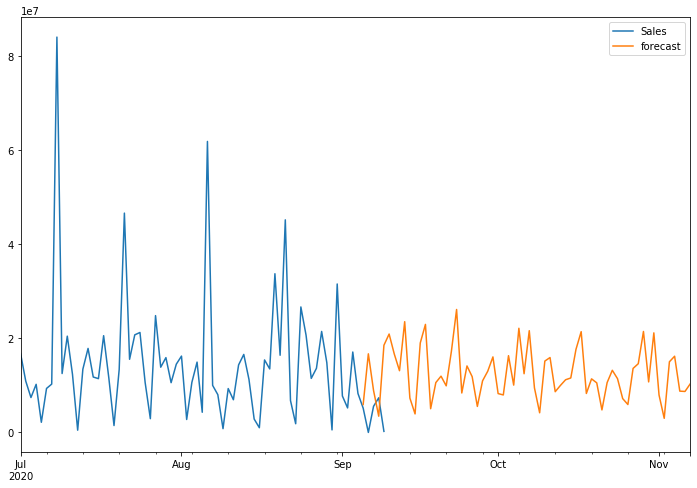

In [47]:
future_df[['Sales','forecast']].plot(figsize=(12,8))

In [48]:
future_df.shape

(130, 2)

In [49]:
future_df.tail()


,Sales,forecast
2020-11-03,NaN,1.500975e+07
2020-11-04,NaN,1.618846e+07
2020-11-05,NaN,8.775186e+06
2020-11-06,NaN,8.704964e+06
2020-11-07,NaN,1.030538e+07


In [50]:
a.sum()

800393373.3203442

In [51]:
X.sum()

1017534428.7600001